# The Engineering WOrld - A Place For Learning And Exploring

## PLotting MOre Variables

Standard imports

In [8]:
import numpy as np
import scipy.stats
import pandas as pd

In [9]:
import matplotlib
import matplotlib.pyplot as pp

import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [10]:
import re
import mailbox
import csv

In [11]:
gapminder = pd.read_csv('gapminder.csv')

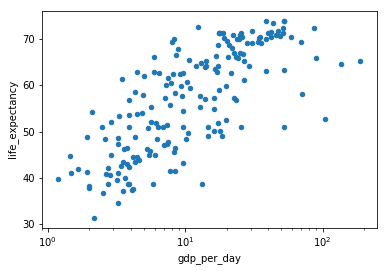

In [12]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True)
    
plotyear(1965)

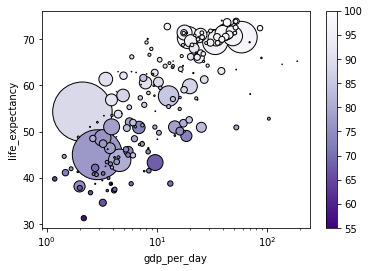

In [19]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=area, c= color,
                      colormap = matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax= 100,
                     linewidths=1, edgecolors = 'k', sharex=False)
    
plotyear(1965)

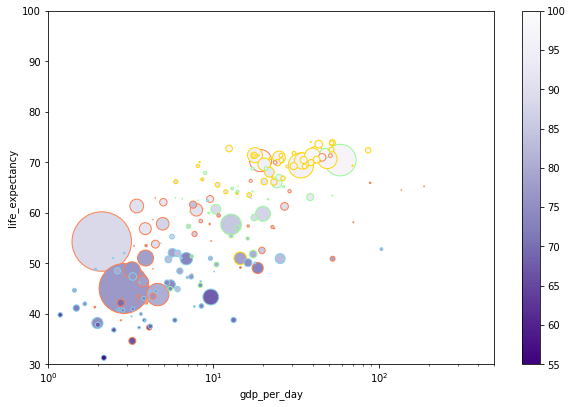

In [20]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})
    
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=area, c= color,
                      colormap = matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax= 100,
                     linewidths=1, edgecolors = edgecolor, sharex=False, figsize=(10,6.5))
    
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    
plotyear(1965)

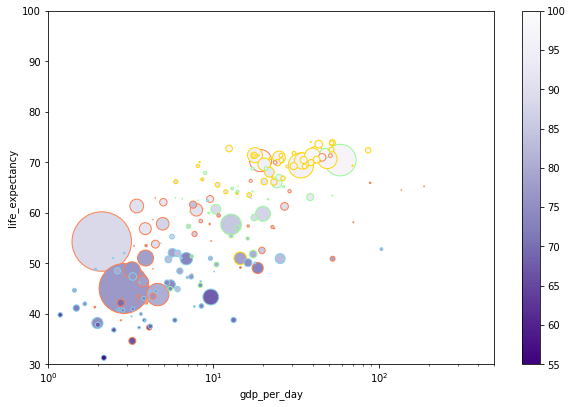

<function __main__.plotyear(year)>

In [21]:
interact(plotyear, year=range(1965,2016,10))

In [22]:
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [23]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

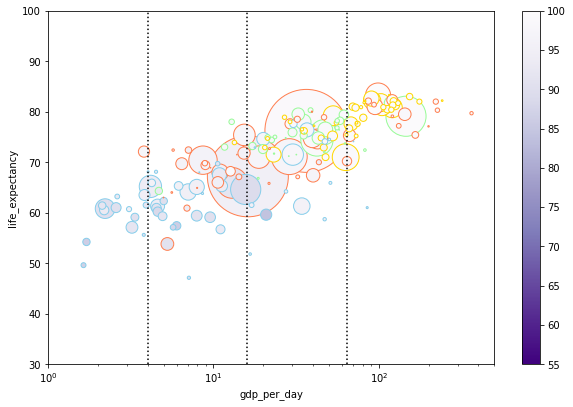

In [25]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population', ascending=False)
    area = 5e-6 * data.population
    edgecolor = data.region.map({'Africa': 'skyblue', 'Europe':'gold', 'America':'palegreen', 'Asia':'coral'})
    
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day', 'life_expectancy', logx=True, s=area, c= color,
                      colormap = matplotlib.cm.get_cmap('Purples_r'), vmin=55, vmax= 100,
                     linewidths=1, edgecolors = edgecolor, sharex=False, figsize=(10,6.5))
    
    
    for level in [4,16, 64]:
        pp.axvline(level,linestyle=':', color='k')
        
    pp.axis(xmin=1, xmax=500, ymin=30, ymax=100)
    
plotyear(2015)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001443637D2B0>,
      dtype=object)

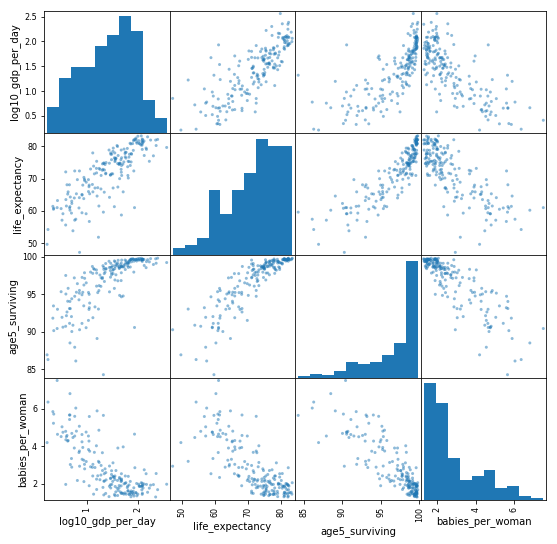

In [30]:
gapminder['log10_gdp_per_day'] = np.log10(data['gdp_per_day'])

data = gapminder.loc[gapminder.year == 2015, ['log10_gdp_per_day', 'life_expectancy', 'age5_surviving', 'babies_per_woman']]

pandas.plotting.scatter_matrix(data, figsize=(9,9))